## Research question: Do subscribers take shorter trips than customers?

__ Null Hypothesis:__ There is no difference between the mean trip duration (d) for subscribers compared to the mean trip duation for customers. $$H_{0}: \bar{d}_{sub} = \bar{d}_{cus}$$

__ Alternative Hypothesis:__ The mean trip duration (d) for subscribers is not equal to the mean trip duration for customers. $$H_{0}: \bar{d}_{sub} \neq \bar{d}_{cus} $$

In [1]:
from __future__  import print_function, division
import pandas as pd
import numpy as np

import pylab as pl
%pylab inline
import seaborn as sns

import os
os.environ["DFDATA"] = "/home/cusp/mms991/PUIdata" # delete before submitting

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
DFData = os.getenv("DFDATA")
print(DFData)

/home/cusp/mms991/PUIdata


In [3]:
# the dataset we are interested in: 201707-citibike-tripdata.csv
datestring = "201703"
#checking if the file is in environment
os.path.isfile(DFData + "/" + datestring + "-citibike-tripdata.zip")

False

In [4]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(DFData + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + DFData):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(DFData + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.csv.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.csv.zip " + DFData)
            ### unzip the csv 
            os.system("unzip " + DFData + "/" + datestring + "-citibike-tripdata.csv.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + DFData)
    ### One final check:
    if not os.path.isfile(DFData + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [5]:
getCitiBikeCSV(datestring)

file in place, you can continue


In [6]:
'''
figure out how to make this work
try:
    os.system("unzip " + DFData + "/" + datestring + "-citibike-tripdata.csv.zip")
    data = pd.read_csv(DFData + "/" + datestring + '-citibike-tripdata.csv')
except:
    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.csv.zip")
    os.system("mv " + datestring + "-citibike-tripdata.zip " + DFData)
    os.system("unzip " + DFData + "/" + datestring + "-citibike-tripdata.csv.zip")
    data = pd.read_csv(DFData + "/" + datestring + '-citibike-tripdata.csv')
    print("data file wasn't available in DFData so we pulled directly from the internet")
'''

'\nfigure out how to make this work\ntry:\n    os.system("unzip " + DFData + "/" + datestring + "-citibike-tripdata.csv.zip")\n    data = pd.read_csv(DFData + "/" + datestring + \'-citibike-tripdata.csv\')\nexcept:\n    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.csv.zip")\n    os.system("mv " + datestring + "-citibike-tripdata.zip " + DFData)\n    os.system("unzip " + DFData + "/" + datestring + "-citibike-tripdata.csv.zip")\n    data = pd.read_csv(DFData + "/" + datestring + \'-citibike-tripdata.csv\')\n    print("data file wasn\'t available in DFData so we pulled directly from the internet")\n'

In [7]:
# creating pandas data frame object of citi bike data
data = pd.read_csv(DFData + "/" + datestring + '-citibike-tripdata.csv')
# show first 10 rows of Citi Bike trip data from 2017-03
data.head(10)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,1893,2017-03-01 00:00:32,2017-03-01 00:32:06,2009,Catherine St & Monroe St,40.711174,-73.996826,527,E 33 St & 2 Ave,40.744023,-73.976056,27291,Subscriber,1973.0,2
1,223,2017-03-01 00:01:09,2017-03-01 00:04:53,127,Barrow St & Hudson St,40.731724,-74.006744,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,19387,Subscriber,1985.0,2
2,1665,2017-03-01 00:01:27,2017-03-01 00:29:12,174,E 25 St & 1 Ave,40.738177,-73.977387,307,Canal St & Rutgers St,40.714275,-73.989900,15809,Subscriber,1988.0,1
3,100,2017-03-01 00:01:29,2017-03-01 00:03:10,316,Fulton St & William St,40.709560,-74.006536,306,Cliff St & Fulton St,40.708235,-74.005301,18956,Subscriber,1991.0,1
4,1229,2017-03-01 00:01:33,2017-03-01 00:22:02,536,1 Ave & E 30 St,40.741444,-73.975361,259,South St & Whitehall St,40.701221,-74.012342,25728,Subscriber,1963.0,1
5,613,2017-03-01 00:01:57,2017-03-01 00:12:11,259,South St & Whitehall St,40.701221,-74.012342,276,Duane St & Greenwich St,40.717488,-74.010455,16257,Subscriber,1984.0,1
6,157,2017-03-01 00:02:12,2017-03-01 00:04:49,3329,Degraw St & Smith St,40.682915,-73.993182,3384,Smith St & 3 St,40.678724,-73.995991,26868,Subscriber,1963.0,1
7,233,2017-03-01 00:02:15,2017-03-01 00:06:08,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,3090,N 8 St & Driggs Ave,40.717746,-73.956001,21657,Subscriber,1976.0,1
8,317,2017-03-01 00:02:38,2017-03-01 00:07:55,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,3285,W 87 St & Amsterdam Ave,40.788390,-73.974700,26933,Subscriber,1981.0,1
9,2042,2017-03-01 00:02:54,2017-03-01 00:36:57,128,MacDougal St & Prince St,40.727103,-74.002971,3289,W 90 St & Amsterdam Ave,40.790179,-73.972889,25371,Subscriber,1964.0,1


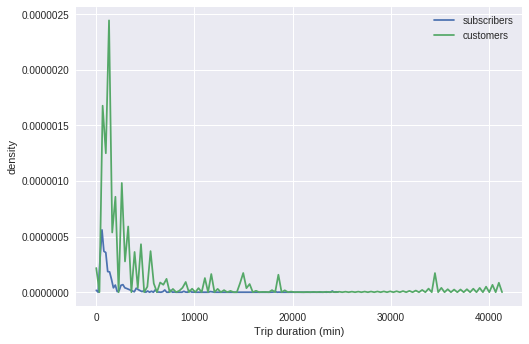

In [8]:
# convert seconds into minutes
data["Trip Duration"] = (data["Trip Duration"]/60)

# Show distribution of 'Trip Duration' by 'User Type' (Customer vs Subscriber)
subs = data[data['User Type']=='Subscriber']
custs = data[data['User Type']=='Customer']
#sns.distplot(subs['Trip Duration'], label = 'subscribers')
#sns.distplot(custs['Trip Duration'], label = 'customers')
sns.kdeplot(subs['Trip Duration'], label = 'subscribers')
sns.kdeplot(custs['Trip Duration'], label = 'customers')
pl.legend();

pl.xlabel("Trip duration (min)")
pl.ylabel("density")

__ Fig. 1__ Density plot of Trip Duration by User Type. This plot shows that the shape of the distribution of trip duration is roughly the same (high positive skew) and should caution us on using a measure such as the mean to assess differences given it's susceptibility to outliers. The median or trimmed mean may be a better choice.

In [18]:
# filtering data to only include Trip Duration and User Type columns
databyusertype = data.filter(["Trip Duration","User Type"],axis=1)
databyusertype.head(10)

,Trip Duration,User Type
0,31.550000,Subscriber
1,3.716667,Subscriber
2,27.750000,Subscriber
3,1.666667,Subscriber
4,20.483333,Subscriber
5,10.216667,Subscriber
6,2.616667,Subscriber
7,3.883333,Subscriber
8,5.283333,Subscriber
9,34.033333,Subscriber


In [10]:
databyusertype.groupby('User Type').describe()

Index  Trip Duration
User Type                                     
Customer   count   26777.000000   26777.000000
           mean   406961.268626      38.834535
           std    208384.764821     423.583227
           min        43.000000       1.016667
           25%    226605.000000      13.483333
           50%    434693.000000      21.016667
           75%    571288.000000      28.433333
           max    727599.000000   41336.500000
Subscriber count  695752.000000  695752.000000
           mean   361944.172560      12.072714
           std    209946.976417      68.142457
           min         0.000000       1.016667
           25%    180115.750000       5.483333
           50%    360838.500000       8.733333
           75%    541270.250000      14.133333
           max    727664.000000   24623.716667

In [19]:
durationbyuser = databyusertype.groupby(['User Type']).mean()
durationbyuser

,Trip Duration
User Type,
Customer,38.834535
Subscriber,12.072714


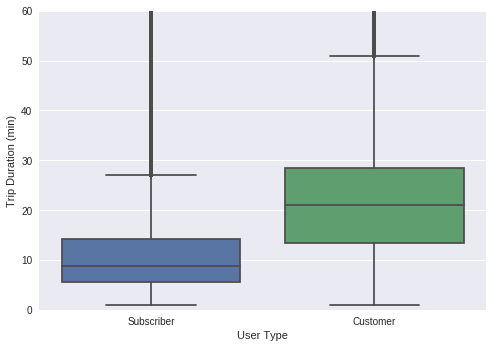

In [26]:
ax = sns.boxplot(x="User Type", y="Trip Duration", data=databyusertype)
ax.set(ylim=(0,60))
pl.ylabel("Trip Duration (min)")

__ Fig. 2 __ A truncated box plot to show quartile distribution of Trip Duration across two User Types. From this plot you can see more clearly that there is a potential difference in mean trip duration between the two groups, More specifically that the trip duration for Subscribers is smaller than the trip duration for Customers.